In [1]:
import numpy as np
import pandas as pd

In [5]:
dataset = pd.read_csv("../Cleaned-Data.csv")

# print(dataset.head())
print(dataset.columns)

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')


## Keeping features that coincide with second dataset

In [9]:
columns_to_keep = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']
df_common = dataset[columns_to_keep]

print(df_common.head())

   Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
0      1          1          1                        1            1      1   
1      1          1          1                        1            1      1   
2      1          1          1                        1            1      1   
3      1          1          1                        1            1      1   
4      1          1          1                        1            1      1   

   Nasal-Congestion  Runny-Nose  Diarrhea  
0                 1           1         1  
1                 1           1         1  
2                 1           1         1  
3                 1           1         1  
4                 1           1         1  


In [10]:
df_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   Diarrhea                 316800 non-null  int64
dtypes: int64(9)
memory usage: 21.8 MB


## Correlation Among Features

In [11]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # Total sample size
    k = min(contingency_table.shape) - 1  # Smaller dimension minus 1
    return np.sqrt(chi2 / (n * k))

df = df_common.iloc[:, :-1]

# Create an empty DataFrame to store the Cramér's V values
cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate Cramér's V for each pair of features
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect association with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert values to float for better display
cramers_v_matrix = cramers_v_matrix.astype(float)

print("Cramér's V Matrix:")
print(cramers_v_matrix)

Cramér's V Matrix:
                            Fever  Tiredness  Dry-Cough  \
Fever                    1.000000   0.404513   0.050958   
Tiredness                0.404513   1.000000   0.377958   
Dry-Cough                0.050958   0.377958   1.000000   
Difficulty-in-Breathing  0.134833   0.000000   0.377958   
Sore-Throat              0.163629   0.134833   0.050958   
Pains                    0.000000   0.000000   0.000000   
Nasal-Congestion         0.000000   0.000000   0.000000   
Runny-Nose               0.000000   0.000000   0.000000   

                         Difficulty-in-Breathing  Sore-Throat     Pains  \
Fever                                   0.134833     0.163629  0.000000   
Tiredness                               0.000000     0.134833  0.000000   
Dry-Cough                               0.377958     0.050958  0.000000   
Difficulty-in-Breathing                 1.000000     0.404513  0.000000   
Sore-Throat                             0.404513     1.000000  0.000000   

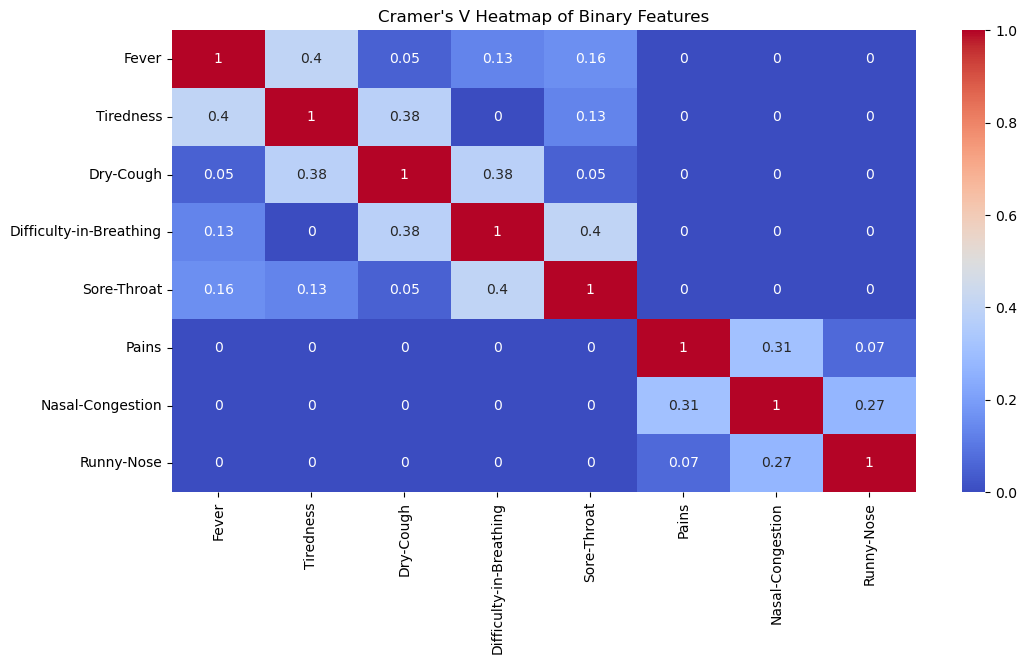

In [12]:
# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cramers_v_matrix.round(2), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramer's V Heatmap of Binary Features")
plt.show()